<a href="https://colab.research.google.com/github/fouzia1146/AI/blob/main/Polynomial_FCNN%26CNN_transferlearning%26Finetunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implement a simple deep neural network (DNN) for solving the polynomial equation y=5x3-10x2-20x+10 with the following specifications:

a)Use three hidden-layers of sizes 32, 64, and 128 and display the generated DNN with the required number of parameters.

b)Generate training samples within the range of -20 to +20. Use an appropriate method for normalizing the training data in the range of -1 to +1.

c)Use 5% of the samples as test data and 5% of the samples as validation data and the rest of the data for training the DNN with an appropriate number of epochs.

d)Display the training accuracy vs validation accuracy and training error vs validation error curves.


Epoch 1/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - loss: 217878080.0000 - mae: 9710.7988 - val_loss: 250941440.0000 - val_mae: 10533.2490
Epoch 2/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 226611296.0000 - mae: 10040.7578 - val_loss: 250846704.0000 - val_mae: 10530.1104
Epoch 3/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 252153920.0000 - mae: 10496.5732 - val_loss: 250536688.0000 - val_mae: 10519.7754
Epoch 4/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 246273984.0000 - mae: 10572.9199 - val_loss: 249657760.0000 - val_mae: 10490.3936
Epoch 5/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 227886656.0000 - mae: 9723.6416 - val_loss: 247615360.0000 - val_mae: 10423.5742
Epoch 6/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 217080992.0000 - mae: 9701.1016 - val_loss: 243628608.0000 - val_mae: 10295.9629
Epoch 7/100
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 233734432.0000 - mae: 10174.8643 - val_loss: 236611344.0000 - val_mae: 10073.9463
Epoch 8/100
29

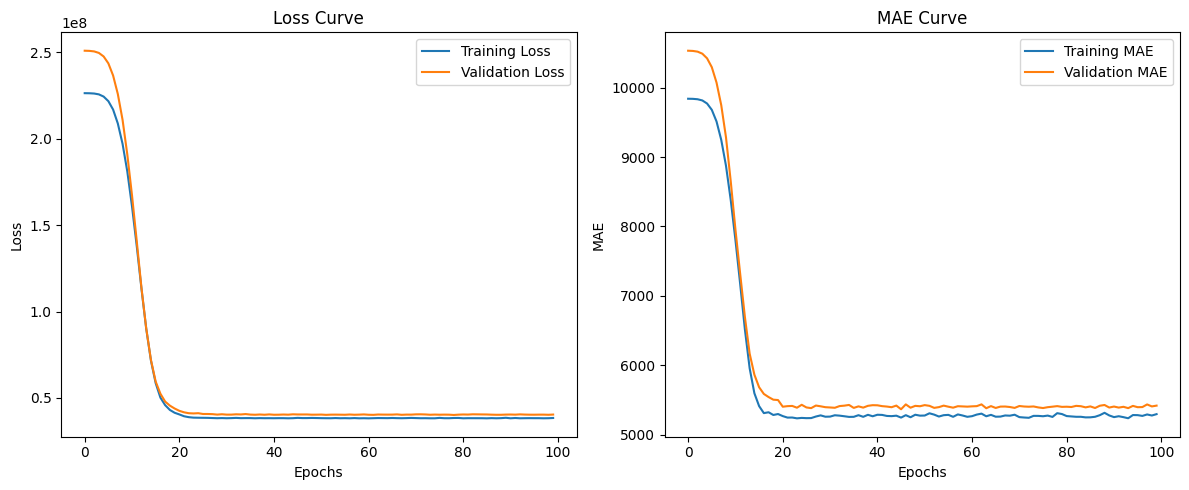

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_25 (Dense)                     │ (None, 32)                  │              64 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_26 (Dense)                     │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_27 (Dense)                     │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,877 (124.52 KB)

 Trainable params: 10,625 (41.50 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 21,252 (83.02 KB)

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# a) Generate training samples within the range of -20 to +20
x = np.linspace(-20, 20, 1000)  # 1000 points in the range [-20, 20]
y = 5 * x**3 - 10 * x**2 - 20 * x + 10  # Polynomial equation

# b) Normalize x to the range of -1 to +1
x_normalized = (x - np.min(x)) / (np.max(x) - np.min(x)) * 2 - 1  # Min-Max normalization

# c) Split the data: 5% test, 5% validation, 90% training
x_train, x_temp, y_train, y_temp = train_test_split(x_normalized, y, test_size=0.1, random_state=42)
x_val, x_test, y_val, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=42)

# d) Build the DNN model with three hidden layers of sizes 32, 64, and 128
model = Sequential([
    Dense(32, activation='relu', input_shape=(1,)),  # First hidden layer with 32 neurons
    Dense(64, activation='relu'),  # Second hidden layer with 64 neurons
    Dense(128, activation='relu'),  # Third hidden layer with 128 neurons
    Dense(1)  # Output layer (no activation function for regression)
])

# Compile the model with Adam optimizer and Mean Squared Error loss
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Train the model
history = model.fit(
    x_train, y_train,  # Training data
    validation_data=(x_val, y_val),  # Validation data
    epochs=100,  # Number of epochs
    batch_size=32,  # Batch size
    verbose=1  # Display progress
)

# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# Display training vs validation accuracy and training vs validation error curves
plt.figure(figsize=(12, 5))

# Training and validation loss curve
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Training and validation MAE curve
plt.subplot(1, 2, 2)
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('MAE Curve')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()

plt.tight_layout()
plt.show()

# Display the model summary to show the architecture and number of parameters
model.summary()


Build a fully connected neural network (FCNN) and a convolutional neural network (CNN) for classifying 10 classes of images.

FCNN

In [ ]:
from tensorflow.keras.layers import Input, Dense, Activation, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
num_classes = 10
inputs = Input((28, 28, 1))
x = Flatten()(inputs)
x = Dense(2, activation = 'sigmoid')(x)
x = Dense(4, activation = 'sigmoid')(x)
x = Dense(8, activation = 'sigmoid')(x)
x = Dense(16, activation = 'sigmoid')(x)
x = Dense(8, activation = 'sigmoid')(x)
x = Dense(4, activation = 'sigmoid')(x)
outputs = Dense(num_classes, name = 'OutputLayer', activation = 'softmax')(x)
model = Model(inputs, outputs, name = 'DNN')
model.summary(show_trainable = True)

Model: "DNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┳━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape                 ┃       Param # ┃ Traina… ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━╇━━━━━━━━━┩
│ input_layer_1 (InputLayer)          │ (None, 28, 28, 1)            │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ flatten (Flatten)                   │ (None, 784)                  │             0 │    -    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_4 (Dense)                     │ (None, 2)                    │         1,570 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_5 (Dense)                     │ (None, 4)                    │            12 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_6 (Dense)                     │ (None, 8)                    │            40 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_7 (Dense)                     │ (None, 16)                   │           144 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_8 (Dense)                     │ (None, 8)                    │           136 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ dense_9 (Dense)                     │ (None, 4)                    │            36 │    Y    │
├─────────────────────────────────────┼──────────────────────────────┼───────────────┼─────────┤
│ OutputLayer (Dense)                 │ (None, 10)                   │            50 │    Y    │
└─────────────────────────────────────┴──────────────────────────────┴───────────────┴─────────┘

 Total params: 1,988 (7.77 KB)

 Trainable params: 1,988 (7.77 KB)

 Non-trainable params: 0 (0.00 B)

Build a fully connected neural network (FCNN) and a convolutional neural network (CNN) for classifying 10 classes of images.

CNN

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model, Sequential

num_classes = 10
inputs = Input((28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax', name='CNN_OutputLayer')(x)
model = Model(inputs, outputs, name='CNN')
model.summary()

Model: "CNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ CNN_OutputLayer (Dense)              │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Train and test your FCNN and CNN by the Fashion dataset. Discuss your results by comparing performance between two types of networks.

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import fashion_mnist

num_classes = 10
inputs = Input((28, 28, 1))
x = Flatten()(inputs)
x = Dense(256, "relu")(x)
x = Dense(512, activation='relu')(x)
x = Dense(256, activation='relu')(x)
x = Dense(128, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax', name='FCNN_OutputLayer')(x)
model = Model(inputs, outputs, name='FCNN')
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0  # Normalize and reshape
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0    # Normalize and reshape

print("==========   FCNN   ==========")
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

print("\n=============================")
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"FCNN Test Accuracy: {accuracy:.4f}")

# CNN
cinputs = Input((28, 28, 1))
cx = Conv2D(32, (3, 3), activation='relu')(cinputs)
cx = MaxPooling2D(pool_size=(2, 2))(cx)
cx = Conv2D(64, (3, 3), activation='relu')(cx)
cx = MaxPooling2D(pool_size=(2, 2))(cx)
cx = Flatten()(cx)
cx = Dense(128, activation='relu')(cx)
coutputs = Dense(num_classes, activation='softmax', name='CNN_OutputLayer')(cx)
cmodel = Model(cinputs, coutputs, name='CNN')
cmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("\n========== CNN ==========")
chistory = cmodel.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2, verbose=1)

print("\n==========================")
closs, caccuracy = cmodel.evaluate(X_test, y_test, verbose=1)
print(f"CNN Test Accuracy: {caccuracy:.4f}")

==========   FCNN   ==========
Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.7635 - loss: 0.6640 - val_accuracy: 0.8454 - val_loss: 0.4234
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.8580 - loss: 0.3849 - val_accuracy: 0.8666 - val_loss: 0.3694
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.8773 - loss: 0.3315 - val_accuracy: 0.8668 - val_loss: 0.3691
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8875 - loss: 0.3054 - val_accuracy: 0.8736 - val_loss: 0.3392
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 19s 13ms/step - accuracy: 0.8889 - loss: 0.2909 - val_accuracy: 0.8842 - val_loss: 0.3253
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 14ms/step - accuracy: 0.8954 - loss: 0.2745 - val_accuracy: 0.8883 - val_loss: 0.3153
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.9007 - loss: 0.2599 - val_accuracy: 0.8854 - val_loss: 0.3145
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accu

Build a CNN having a pre-trained MobileNet as backbone to classify 10 classes.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet import preprocess_input

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = tf.image.resize(x_train, (64, 64)).numpy()
x_test = tf.image.resize(x_test, (64, 64)).numpy()
x_train = preprocess_input(x_train.astype('float32'))
x_test = preprocess_input(x_test.astype('float32'))
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

base_model = MobileNet(weights='imagenet', include_top=False, input_tensor=Input(shape=(64, 64, 3)))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy after Transfer Learning: {accuracy:.4f}")

for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_fine_tune = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=64)

loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f"Test Accuracy after Fine-Tuning: {accuracy:.4f}")

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


<ipython-input-6-7fe0d6d99c05>:17: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_tensor=Input(shape=(64, 64, 3)))


17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 240s 301ms/step - accuracy: 0.6541 - loss: 1.0172 - val_accuracy: 0.7461 - val_loss: 0.7441
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 241s 275ms/step - accuracy: 0.7903 - loss: 0.6009 - val_accuracy: 0.7452 - val_loss: 0.7470
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 261s 274ms/step - accuracy: 0.8426 - loss: 0.4605 - val_accuracy: 0.7430 - val_loss: 0.7914
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 259s 270ms/step - accuracy: 0.8897 - loss: 0.3366 - val_accuracy: 0.7424 - val_loss: 0.8340
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 268s 278ms/step - accuracy: 0.9274 - loss: 0.2357 - val_accuracy: 0.7423 - val_loss: 0.9026
313/313 ━━━━━━━━━━━━━━━━━━━━ 38s 120ms/step - accuracy: 0.7421 - loss: 0.9029
Test Accuracy after Transfer Learning: 0.7423
Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 706s 892ms/step - accuracy: 0.7116 - loss: 1.0253 - val_accuracy: 0.7594 - val_loss: 0.7448
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 

Train and test your CNN having a pre-trained MobileNet as backbone to classify images of the CIFAR-10 dataset. Discuss your results by comparing performance between transfer learning + fine tuning and only transfer learning.

In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNet
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.image import resize
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = tf.image.resize(x_train, (64, 64)).numpy()
x_test = tf.image.resize(x_test, (64, 64)).numpy()
num_classes = 10
x_train = preprocess_input(x_train.astype('float32'))
x_test = preprocess_input(x_test.astype('float32'))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
base_model = MobileNet(weights='imagenet', include_top=False, input_tensor=Input(shape=(64, 64, 3)))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
outputs = Dense(num_classes, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=outputs)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history_transfer = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=16)
transfer_results = model.evaluate(x_test, y_test)
print(f"Transfer Learning Test Accuracy: {transfer_results[1] * 100:.2f}%")
for layer in base_model.layers[-10:]:
    layer.trainable = True
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
history_finetune = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)
finetune_results = model.evaluate(x_test, y_test)
print(f"Fine-tuning Test Accuracy: {finetune_results[1] * 100:.2f}%")

<ipython-input-7-31249bdb3a1a>:18: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNet(weights='imagenet', include_top=False, input_tensor=Input(shape=(64, 64, 3)))


Epoch 1/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 302s 95ms/step - accuracy: 0.6742 - loss: 0.9877 - val_accuracy: 0.7414 - val_loss: 0.7524
Epoch 2/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 316s 94ms/step - accuracy: 0.7952 - loss: 0.5876 - val_accuracy: 0.7403 - val_loss: 0.7834
Epoch 3/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 323s 94ms/step - accuracy: 0.8660 - loss: 0.3803 - val_accuracy: 0.7355 - val_loss: 0.9204
Epoch 4/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 327s 96ms/step - accuracy: 0.9292 - loss: 0.2115 - val_accuracy: 0.7342 - val_loss: 1.0364
Epoch 5/5
3125/3125 ━━━━━━━━━━━━━━━━━━━━ 321s 95ms/step - accuracy: 0.9600 - loss: 0.1222 - val_accuracy: 0.7364 - val_loss: 1.3175
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 122ms/step - accuracy: 0.7330 - loss: 1.3387
Transfer Learning Test Accuracy: 73.64%
Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 584s 739ms/step - accuracy: 0.7908 - loss: 0.9688 - val_accuracy: 0.7422 - val_loss: 1.0539
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 637s 759ms/step - accuracy: 0.8960 - loss: 0.3041 